<h4>Done by : 

<br>
<br>

Group Name : ML_GROUP113  Ban_2

<br>

<br>
RAJABOINA SIVARAJA
<br>
POLEPEDDI L V SAINADHA RAKESH
<br>
MANU JOY
<br>
NIPUN PATHAK

<br>
</h4>

In [1426]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA

# Loading Data

In [1427]:
# Read input file with pandas CSV reader
df = pd.read_csv("spambase.data", header=None)

#checking head result from data frame
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [1428]:
shape = df.shape
print("data Frame is having {} rows and {} columns".format(shape[0],shape[1]))

data Frame is having 4601 rows and 58 columns


In [1429]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [1430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
0     4601 non-null float64
1     4601 non-null float64
2     4601 non-null float64
3     4601 non-null float64
4     4601 non-null float64
5     4601 non-null float64
6     4601 non-null float64
7     4601 non-null float64
8     4601 non-null float64
9     4601 non-null float64
10    4601 non-null float64
11    4601 non-null float64
12    4601 non-null float64
13    4601 non-null float64
14    4601 non-null float64
15    4601 non-null float64
16    4601 non-null float64
17    4601 non-null float64
18    4601 non-null float64
19    4601 non-null float64
20    4601 non-null float64
21    4601 non-null float64
22    4601 non-null float64
23    4601 non-null float64
24    4601 non-null float64
25    4601 non-null float64
26    4601 non-null float64
27    4601 non-null float64
28    4601 non-null float64
29    4601 non-null float64
30    4601 non-null float64
31    4601 non-null float

In [1431]:
##Checking correlation
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
1,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
2,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
3,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
4,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
5,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
6,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
7,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
8,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
9,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


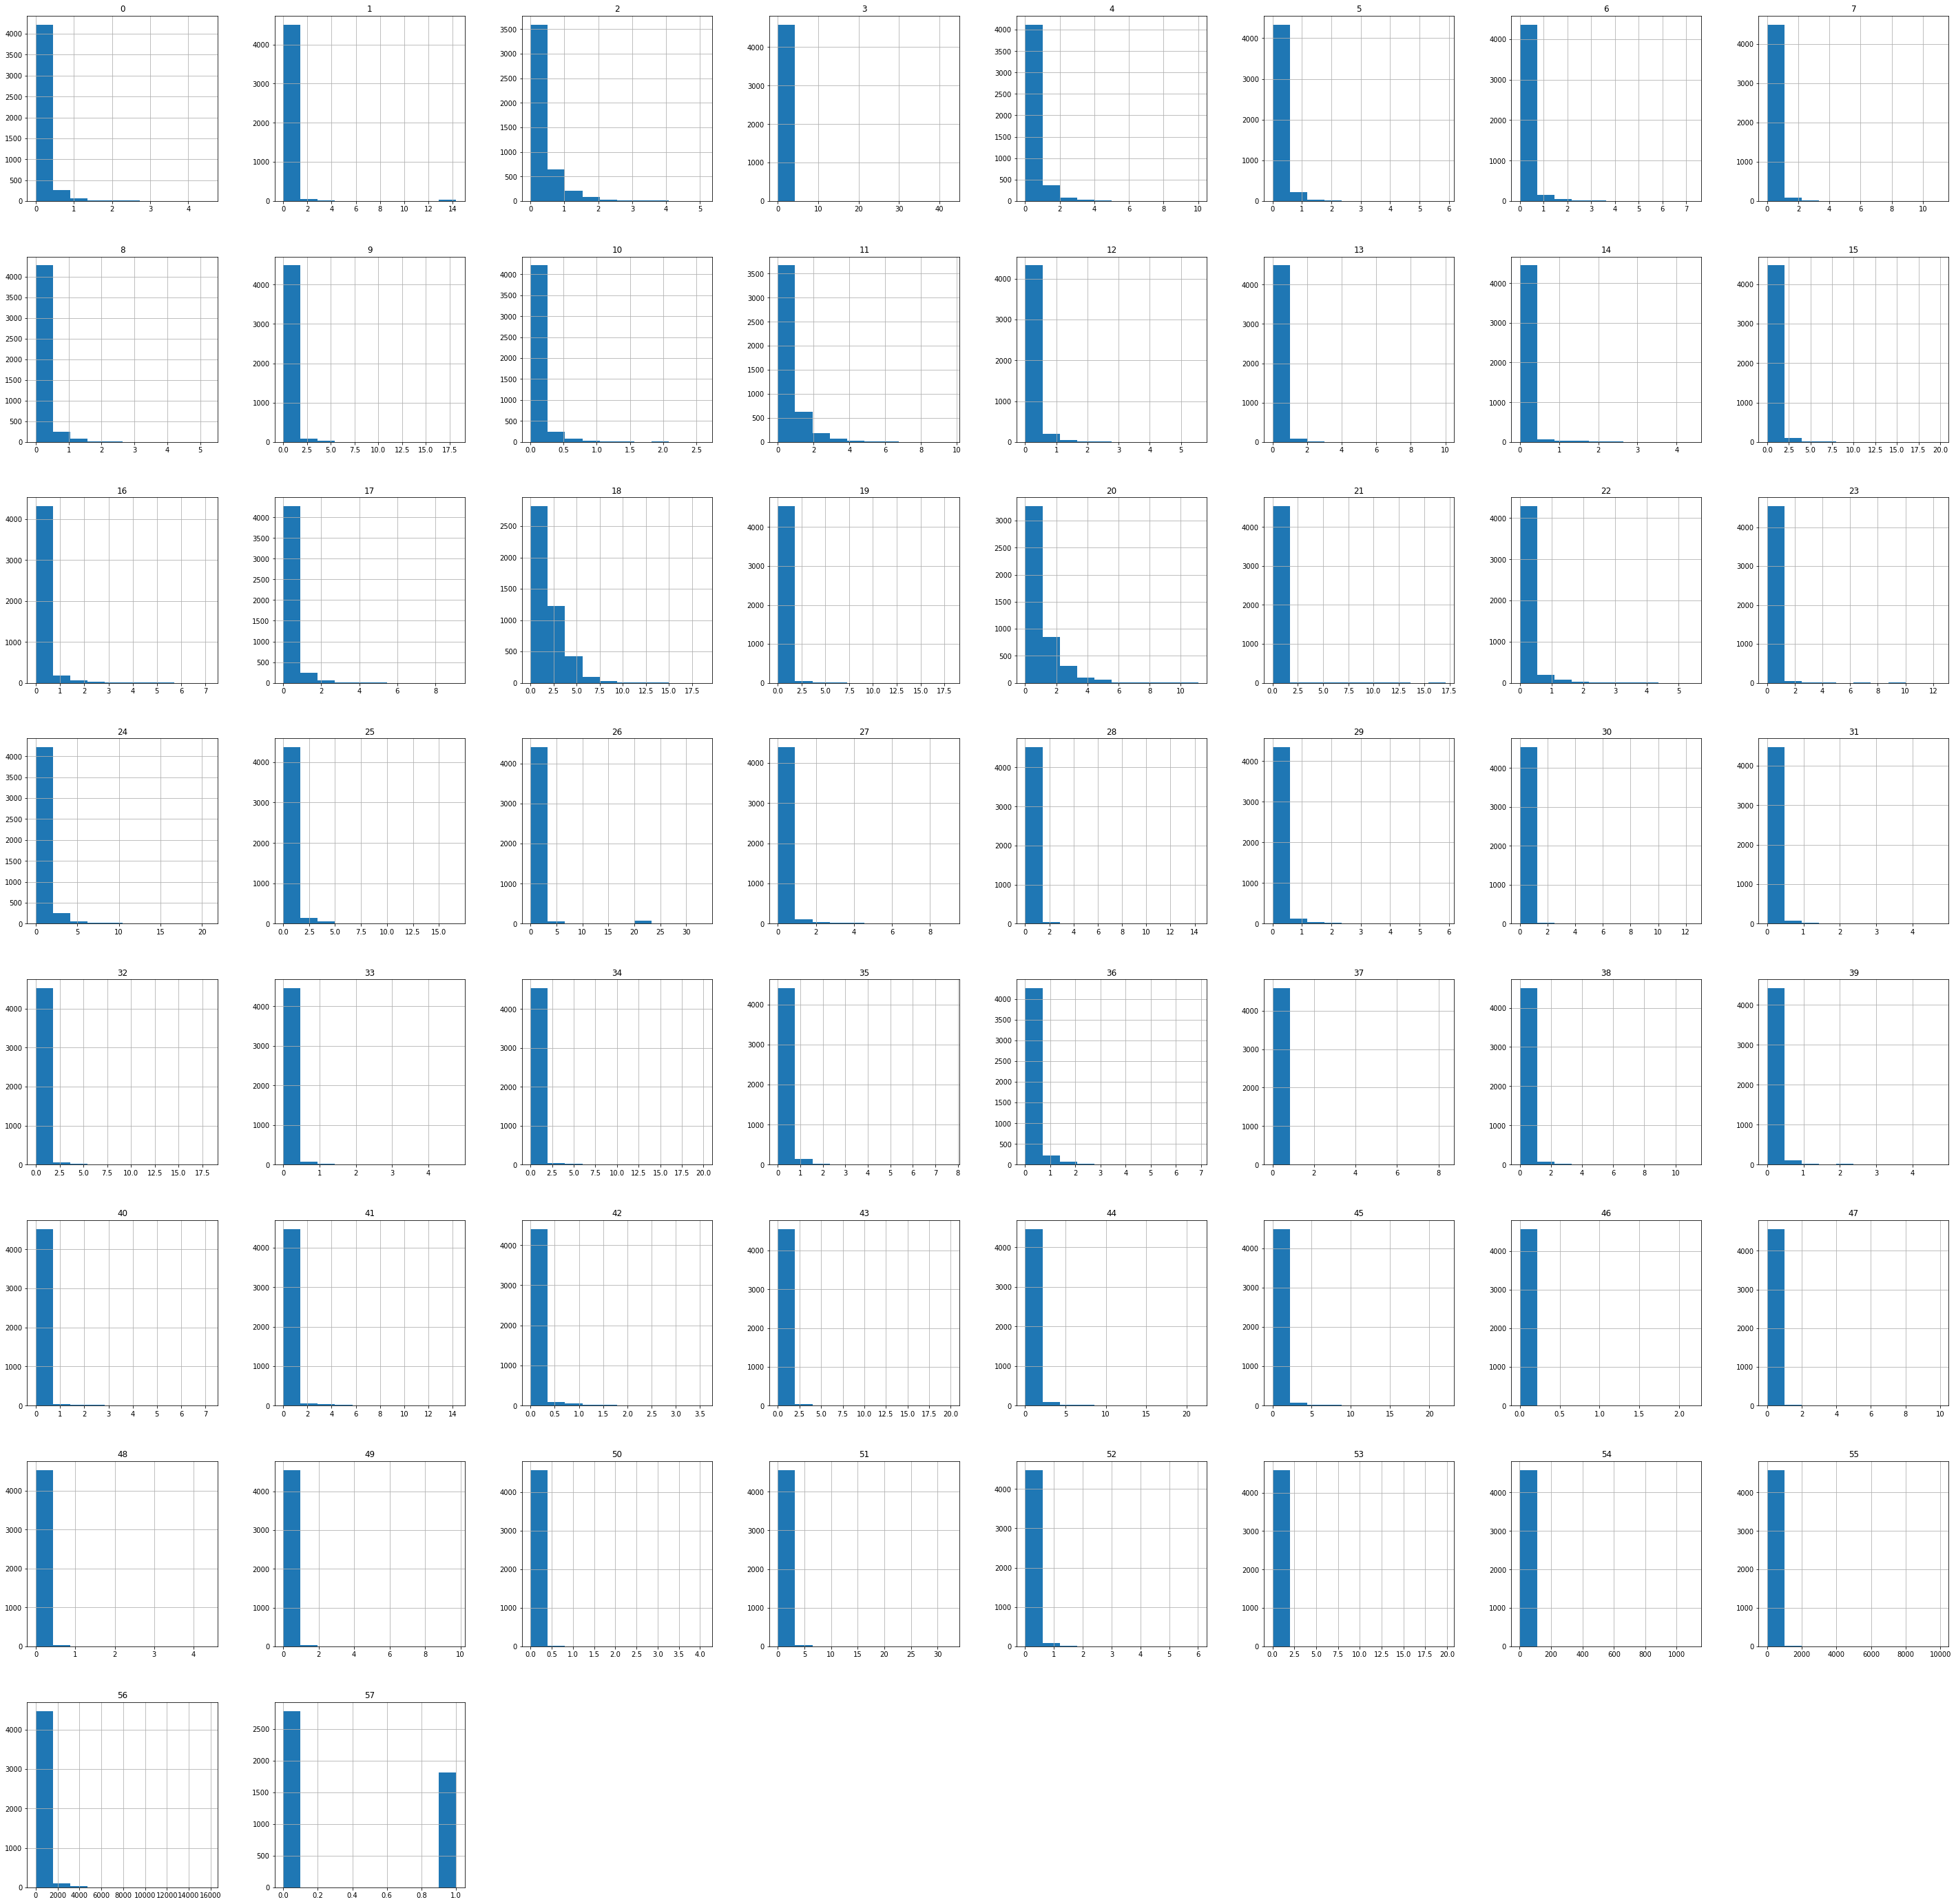

In [1432]:
df.hist(figsize = (50,50) )
plt.show()

###  There are no NA or Null in the data set

       0  type
57            
0   2788   ham
1   1813  spam


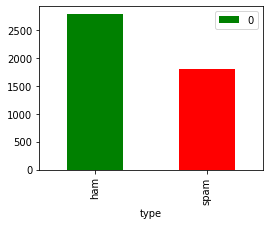

In [1433]:
count = df.groupby(57).count()[[0]]
fig,ax = plt.subplots(figsize=(4,3))
#plt.bar(count,align = 'center',alpha =0.5)
count['type'] = ['ham',"spam"]
print((count))
count.plot(kind='bar', x= 'type', y = 0, color = ["green","red"],ax=ax)
plt.show()

# there total 2788 ham and 1813 spam records

In [1434]:

X = df.iloc[:,0:-1]
Y = df.iloc[:, -1]

In [1435]:
### there total 2788 ham and 1813 spam records

### checking Features to train
print(X.head())
print(Y.head())

     0     1     2    3     4     5     6     7     8     9   ...   47    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.0  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.0  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.0  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.0  0.00   

      49   50     51     52     53     54   55    56  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191  

[5 rows x 57 columns]
0    1
1    1
2    1
3    1
4    1
Name: 57, dtype: int64


In [1436]:
### checking Features to train
print(X.head())
print(Y.head())

     0     1     2    3     4     5     6     7     8     9   ...   47    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.0  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.0  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.0  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.0  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.0  0.00   

      49   50     51     52     53     54   55    56  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191  

[5 rows x 57 columns]
0    1
1    1
2    1
3    1
4    1
Name: 57, dtype: int64


In [1437]:
x_train,x_test,y_train, y_test = train_test_split(X,Y,train_size=0.8,random_state=42,stratify=Y)


In [1438]:
x_train.reset_index(drop = True,inplace = True)
y_train.reset_index(drop =  True, inplace  = True)


###### tf-idf, short for term frequency–inverse document frequency, is a numeric measure that is use to score the importance of a word in a document based on how often did it appear in that document and a given collection of documents. The intuition for this measure is : If a word appears frequently in a document, then it should be important and we should give that word a high score. But if a word appears in too many other documents, it’s probably not a unique identifier, therefore we should assign a lower score to that word. The math formula for this measure :

<img class="nh ol cp t u gb ak gk" width="319" height="200" role="presentation" src="https://miro.medium.com/max/638/1*Uucq42G4ntPGJKzI84b3aA.png">

In [1439]:
idf = np.count_nonzero(X, axis=0)
print(idf.shape)
idf = np.log(shape[0]/idf)
idf[48:58] = 1 ## making these columns as 1 because they are not word
### IDF(i) =  ln(total number of docuemnts / total number of documents that have the term i), ln -> natural logarithm
x_train = x_train * idf
x_test  = x_test * idf
print(idf)

(57,)
[1.47463044 1.63385888 0.8907556  4.58388135 0.96780139 1.52727417
 1.74070528 1.71985842 1.7837499  1.26237213 1.87017342 0.68255363
 1.68644242 2.55629317 2.61691779 1.31035616 1.56397554 1.48897789
 0.35472076 2.38429549 0.64126723 3.67185502 1.91340782 1.83415845
 1.44009597 1.7357609  1.77473503 2.2963019  2.5151351  2.28342618
 2.75385634 3.11101897 2.43014188 3.06339092 2.24988006 2.03876735
 1.7138088  4.01518834 2.4833864  2.31813682 3.43681668 2.60214647
 2.50710292 2.64406878 1.25548347 2.18598608 4.29089422 3.12082297
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]


## Feature Extraction using PCA 

In [1440]:
pca = PCA(10)
pca.fit_transform(X.iloc[:,0:48])
print(pca.explained_variance_ratio_)

[0.33605585 0.12035459 0.0769027  0.05684007 0.04784365 0.03946085
 0.03097733 0.02911167 0.02493435 0.02415078]


In [1441]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_mnb = x_train
y_train_mnb = y_train
x_test_mnb = x_test
y_test_mnb = y_test

x_train = pd.DataFrame(sc.fit_transform(x_train))
x_test  = pd.DataFrame(sc.transform(x_test))

## fitting Gaussian,Bernoulli, Multinomial Models

In [1442]:
gaussian_nb = GaussianNB()
bernoulli_nb = BernoulliNB()
multinomial_nb = MultinomialNB()
kf = KFold(n_splits = 10)
gaussian_result = cross_val_score(gaussian_nb,x_train,y_train,cv =kf,scoring = 'accuracy')
bernoulli_result = cross_val_score(gaussian_nb,x_train,y_train,cv =kf,scoring = 'accuracy')
multinomial_result = cross_val_score(multinomial_nb,x_train_mnb,y_train_mnb,cv = kf ,scoring = 'accuracy')

In [1443]:
gaussian_nb.fit(x_train,y_train)
bernoulli_nb.fit(x_train,y_train)
multinomial_nb.fit(x_train_mnb.to_numpy(),y_train_mnb.to_numpy())
gaussian_predicts  = gaussian_nb.predict(x_test)
bernoulli_predicts = bernoulli_nb.predict(x_test)
multinomial_predicts = multinomial_nb.predict(x_test_mnb)
gaussian_acc = metrics.accuracy_score(y_test, gaussian_predicts)
bernoulli_acc = metrics.accuracy_score(y_test,bernoulli_predicts)
multinomial_acc = metrics.accuracy_score(y_test_mnb,multinomial_predicts)
print(gaussian_predicts.shape)

(921,)


## 10 fold validation results

In [1444]:
print("GaussianNB result",gaussian_result.mean())
print("BernoulliNB result",bernoulli_result.mean())
print("MultinomialNB result",bernoulli_result.mean())

GaussianNB result 0.8182065217391304
BernoulliNB result 0.8182065217391304
MultinomialNB result 0.8182065217391304


## Accuracy of models

In [1445]:
print("GaussianNB result",gaussian_acc)
print("BernoulliNB result",bernoulli_acc)
print("MultinomialNB result",multinomial_acc)

GaussianNB result 0.8327904451682954
BernoulliNB result 0.9011943539630836
MultinomialNB result 0.8154180238870793


## Observation: Accuracy score increased due to stratified sampling. Because the Ham records are more than spam

## Visualizing Outputs

____________________________________________________________________________________________________
Gaussian NB model Confusion matrix for predected values


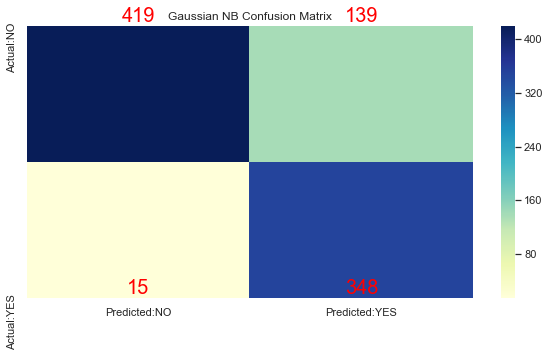

In [1493]:
print('_'*100)

print('Gaussian NB model Confusion matrix for predected values')
sb.set()
gs_cf = confusion_matrix(y_test.to_numpy(),gaussian_predicts)
df_gs = pd.DataFrame(gs_cf, index=['Actual:NO','Actual:YES'], columns=['Predicted:NO','Predicted:YES'])
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('Gaussian NB Confusion Matrix')
akws = {"ha": 'center',"va": 'bottom',"color":'red',"size":20}
sb.heatmap(df_gs,annot=True, fmt="d",cmap="YlGnBu",annot_kws=akws,ax= ax)
plt.show()

____________________________________________________________________________________________________
Bernoulli NB model Confusion matrix for predected values


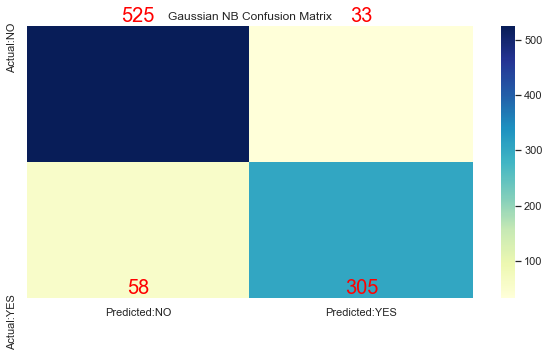

In [1494]:
print('_'*100)

print('Bernoulli NB model Confusion matrix for predected values')
sb.set()
gs_cf = confusion_matrix(y_test.to_numpy(),bernoulli_predicts)
df_br = pd.DataFrame(gs_cf, index=['Actual:NO','Actual:YES'], columns=['Predicted:NO','Predicted:YES'])
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('Bernouli NB Confusion Matrix')
akws = {"ha": 'center',"va": 'bottom',"color":'red',"size":20}
sb.heatmap(df_br,annot=True, fmt="d",cmap="YlGnBu",annot_kws=akws,ax= ax)
plt.show()

____________________________________________________________________________________________________
Multinomial NB model Confusion matrix for predected values


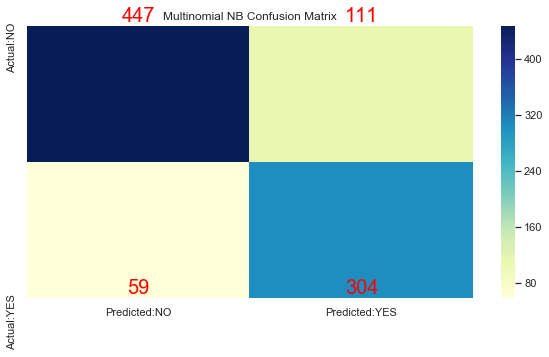

In [1498]:
print('_'*100)

print('Multinomial NB model Confusion matrix for predected values')
sb.set()
gs_cf = confusion_matrix(y_test.to_numpy(),multinomial_predicts)
df_ml = pd.DataFrame(gs_cf, index=['Actual:NO','Actual:YES'], columns=['Predicted:NO','Predicted:YES'])
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title('Multinomial NB Confusion Matrix')
akws = {"ha": 'center',"va": 'bottom',"color":'red',"size":20}
sb.heatmap(df_ml,annot=True, fmt="d",cmap="YlGnBu",annot_kws=akws,ax= ax)
plt.show()

In [ ]:
colors = list()

for i in probs[:,1]:
    if(0.5):
        colors.append( 'red')
    else:
        colors.append('green')

# This is the plot against predicted class and probabiolitieS

In [ ]:
colors = list()

for i in range(0,probs.shape[0]):
    if(y_train[i] == 1):
        colors.append( 'red')
    else:
        colors.append('green')


In [ ]:
plt.rcParams["figure.figsize"] = (40,10)
plt.scatter(x= range(0,probs.shape[0]),y = probs[:,0] ,color = colors)
#plt.scatter(x= probs[:,1],y = probs[:,0])


In [ ]:
reg = LogisticRegression()


In [ ]:
reg.fit(x_train,y_train)

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x=range(0,x_train.shape[0]),y = probs[:,1],color = colors,s = 10)
# coeff = reg.coef_.T
# m = reg.coef_.T.mean()
# ry = [coeff[0]* x for i,x in range(0,x_train.iloc[0])+for i,[reg.intercept x in range(0,x_train.iloc[0]))
# plt.plot(ry)
#print(reg.predict(probs))

In [ ]:
reg.intercept_